In [1]:
import numpy as np
import math
import pandas as pd

In [34]:
from matplotlib import pyplot as plt

In [17]:
df1 = pd.read_csv(r'visible_range\kaikovo\t1n_lvl_2.txt',header=None,sep="\t")

In [18]:
df2= pd.read_csv(r'visible_range\kaikovo\t1s_lvl_2.txt',header=None,sep="\t")

In [19]:
df3= pd.read_csv(r'visible_range\kaikovo\t3_lvl_2.txt',header=None,sep="\t")

In [20]:
df4= pd.read_csv(r'visible_range\kaikovo\t4_lvl_2.txt',header=None,sep="\t")

In [21]:
df1.columns = ['x', 'y']
df2.columns = ['x', 'y']
df3.columns = ['x', 'y']
df4.columns = ['x', 'y']


In [22]:
rlist = [450, 510, 800, 680, 700, 670, 550, 750, 705, 445, 500, 734, 747, 715, 720, 740, 780, 440, 690, 420, 695, 620, 650, 560, 540, 600, 410, 480, 708, 810, 861]

In [23]:
res_dic = {}
for r in rlist:
    res_dic[r] = [df1.loc[abs(df1.x - r).sort_values().index[0]].y]
    res_dic[r].append(df2.loc[abs(df2.x - r).sort_values().index[0]].y)
    res_dic[r].append(df3.loc[abs(df3.x - r).sort_values().index[0]].y)
    res_dic[r].append(df4.loc[abs(df4.x - r).sort_values().index[0]].y)


In [24]:
mean_dict = {}

In [25]:
solve_dict = {}

In [26]:
for r in rlist:
    mean_dict[r] = np.mean(res_dic[r])
    solve_dict[r] = mean_dict[r]

In [27]:
NDVI = (solve_dict[800]-solve_dict[680])/(solve_dict[800]+solve_dict[680])
MCARI = ((solve_dict[700]-solve_dict[670])-0.2*(solve_dict[700]-solve_dict[550]))*(solve_dict[700]/solve_dict[670])
WCARI2 = (1.5*(2.5*(solve_dict[800]-solve_dict[670])-1.3*(solve_dict[800]-solve_dict[550])))/(math.sqrt((2*solve_dict[800]+1)*(2*solve_dict[800]+1)-(6*solve_dict[800]-5*math.sqrt(solve_dict[670]))-0.5)) 
MRENDVI=(solve_dict[750]-solve_dict[705])/(solve_dict[750]+solve_dict[705]-2*solve_dict[445])
MRESR = (solve_dict[750]-solve_dict[445])/(solve_dict[705]-solve_dict[445])
MTVI = 1.2*(1.2*(solve_dict[800]-solve_dict[550])-2.5*(solve_dict[670]-solve_dict[550]))
RENDVI = (solve_dict[750]-solve_dict[705])/(solve_dict[750]+solve_dict[705])
PSRI = (solve_dict[680]-solve_dict[500])/solve_dict[750]
Re = (solve_dict[670]+solve_dict[780])/2
REP = 700+40*((Re - solve_dict[700])/(solve_dict[740]-solve_dict[700]))
BR = solve_dict[440]/solve_dict[690]
FR720 = (solve_dict[734] - solve_dict[747])/(solve_dict[715]-solve_dict[720])
ARI2 = solve_dict[800] * ((1/solve_dict[550]) - (1/solve_dict[700]))
CRI1 = (1/solve_dict[510])-(1/solve_dict[550])
DI1 = solve_dict[800] - solve_dict[550]
SIPI = (solve_dict[800] - solve_dict[445])/(solve_dict[800]+solve_dict[680])
LV = (solve_dict[550]*solve_dict[680])/(solve_dict[450]*solve_dict[450])
GNDVI = (solve_dict[810]-((solve_dict[510]+solve_dict[861])/2))/(solve_dict[810]+((solve_dict[510]+solve_dict[861])/2))

In [31]:
table = pd.DataFrame({'Index': ['NDVI', 'MCARI', 'WCARI2', 'MRENDVI', 'MRESR', 'MTVI', 'RENDVI', 'PSRI', 'REP','BR','FR720','ARI2','CRI1','DI1','SIPI','LV'],
                      'Kaikovo': [NDVI,MCARI,WCARI2,MRENDVI,MRESR,MTVI,RENDVI,PSRI,REP,BR,FR720,ARI2,CRI1,DI1, SIPI,LV]})

In [32]:
table.to_excel(r'visible_range\kaikovo\kaikovo_index_lvl_2.xlsx')

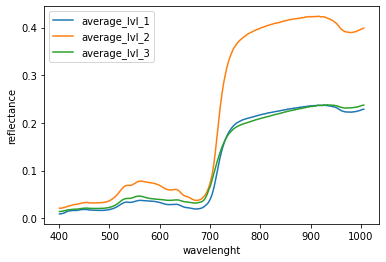

In [35]:
df = pd.read_table(r'visible_range\kaikovo\t5_lvl_1.txt',header=None,sep=r"\s+")
df = pd.DataFrame({'wavelenght': df.iloc[:,0], 'reflectance': df.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df['wavelenght'], df['reflectance'],label = 'ex1_health')

df1 = pd.read_table(r'visible_range\kaikovo\t7_lvl_1.txt',header=None,sep=r"\s+")
df1 = pd.DataFrame({'wavelenght': df1.iloc[:,0], 'reflectance': df1.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df1['wavelenght'], df1['reflectance'],label = 'ex2_health')

df2 = pd.read_table(r'visible_range\kaikovo\t8_lvl_1.txt',header=None,sep=r"\s+")
df2 = pd.DataFrame({'wavelenght': df2.iloc[:,0], 'reflectance': df2.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df2['wavelenght'], df2['reflectance'],label = 'ex3_health')

df3 = pd.read_table(r'visible_range\kaikovo\t1n_lvl_2.txt',header=None,sep=r"\s+")
df3 = pd.DataFrame({'wavelenght': df3.iloc[:,0], 'reflectance': df3.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df3['wavelenght'], df3['reflectance'],label = 'ex3_ill')

df4 = pd.read_table(r'visible_range\kaikovo\t1s_lvl_2.txt',header=None,sep=r"\s+")
df4 = pd.DataFrame({'wavelenght': df4.iloc[:,0], 'reflectance': df4.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df4['wavelenght'], df4['reflectance'],label = 'ex3_ill')

df5 = pd.read_table(r'visible_range\kaikovo\t3_lvl_2.txt',header=None,sep=r"\s+")
df5 = pd.DataFrame({'wavelenght': df5.iloc[:,0], 'reflectance': df5.iloc[:,1].rolling(15, min_periods=1).mean()})
#plt.plot(df5['wavelenght'], df5['reflectance'],label = 'ex3_ill')

df6 = pd.read_table(r'visible_range\kaikovo\t4_lvl_2.txt',header=None,sep=r"\s+")
df6 = pd.DataFrame({'wavelenght': df6.iloc[:,0], 'reflectance': df6.iloc[:,1].rolling(15, min_periods=1).mean()})

df7 = pd.read_table(r'visible_range\kaikovo\t6_lvl_3.txt',header=None,sep=r"\s+")
df7 = pd.DataFrame({'wavelenght': df7.iloc[:,0], 'reflectance': df7.iloc[:,1].rolling(15, min_periods=1).mean()})

df8 = pd.read_table(r'visible_range\kaikovo\t2_lvl_3.txt',header=None,sep=r"\s+")
df8 = pd.DataFrame({'wavelenght': df8.iloc[:,0], 'reflectance': df8.iloc[:,1].rolling(15, min_periods=1).mean()})


df9 = pd.DataFrame({'wavelenght': df5.iloc[:,0], 'reflectance': ((df.iloc[:,1]+df1.iloc[:,1]+df2.iloc[:,1])/3).rolling(15, min_periods=1).mean()})
plt.plot(df6['wavelenght'], df6['reflectance'],label = 'average_lvl_1')

df10 = pd.DataFrame({'wavelenght': df2.iloc[:,0], 'reflectance': ((df3.iloc[:,1]+df4.iloc[:,1]+df5.iloc[:,1]+df6.iloc[:,1])/4).rolling(15, min_periods=1).mean()})
plt.plot(df7['wavelenght'], df7['reflectance'],label = 'average_lvl_2')

df11 = pd.DataFrame({'wavelenght': df2.iloc[:,0], 'reflectance': ((df7.iloc[:,1]+df8.iloc[:,1])/2).rolling(15, min_periods=1).mean()})
plt.plot(df8['wavelenght'], df8['reflectance'],label = 'average_lvl_3')

plt.xlabel('wavelenght') 
plt.ylabel('reflectance') 
plt.legend()

plt.savefig(r'visible_range\kaikovo\kailovo_average_visible_health_And_ill.png')